In [3]:
## uncomment to install this development version of pyBallMapper 
# !pip install ./pyBallMapper-dev

In [4]:
import numpy as np
import pandas as pd

import networkx as nx

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt
from matplotlib import colormaps

from pyballmapper.plotting import graph_GUI
from bokeh.plotting import figure, show

from pyballmapper import BallMapper

In [5]:
import src.ensemble as ens

## Generate data

(-1.074061673287575,
 2.0542919658738663,
 -1.2094419748211802,
 4.208131143855393)

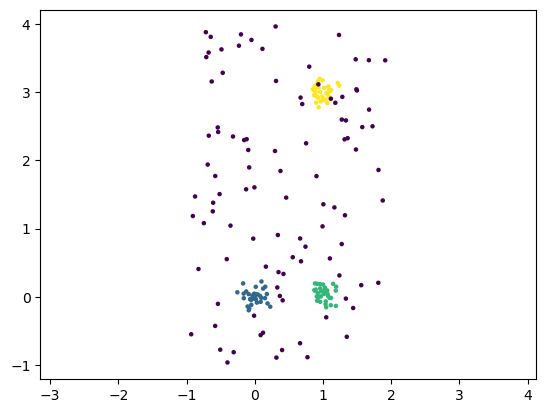

In [6]:
from sklearn.datasets import make_blobs

my_centers = [[0,0], [1,0], [1,3]]

X_blob, y_blob = make_blobs(n_samples=100, n_features=2,
                  centers=my_centers,
                  cluster_std=0.1,
                  shuffle=False, # set it to False to have points ordered by blobs
                  random_state=0)

X_noise = np.random.default_rng(seed=42).uniform(low=[-1,-1], high=[2, 4], size=(100,2))
y_noise = np.array([-1 for i in range(len(X_noise))])

X = np.concatenate((X_blob, X_noise))
y = np.concatenate((y_blob, y_noise))

# X = X_blob
# y = y_blob

plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.axis('equal')

### test run a single BM

<Axes: >

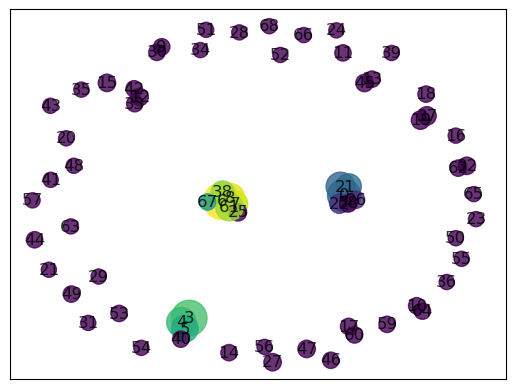

In [7]:
bm = BallMapper(X, 0.25)

bm.add_coloring(coloring_df=pd.DataFrame(y, columns=['y']))
my_palette = colormaps['viridis']
bm.draw_networx(coloring_variable='y', color_palette=my_palette)


## Ensemble BM

In [8]:
## run BM 100 times and compute the normalized similarity matrix
## takes ~ 90 seconds on my laptop
sim_matrix = ens.ensemble_BM(X, 0.2, 100)

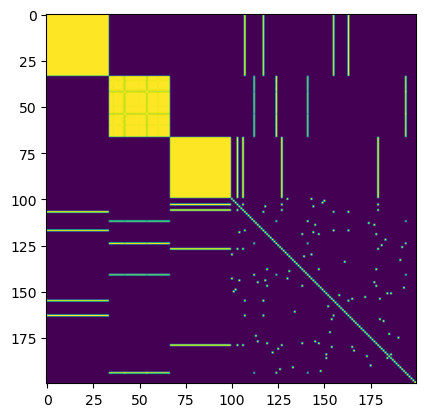

In [9]:
## the noise part is the bottom right
## it shoud look block diagonal if shuffle=False 
## in the data generating function
plt.imshow(sim_matrix)

In [10]:
## convert the similarity matrix to a condensed distance matrix

from scipy.spatial.distance import squareform

distance_condensed = squareform(1 - sim_matrix) # most similar points are closer

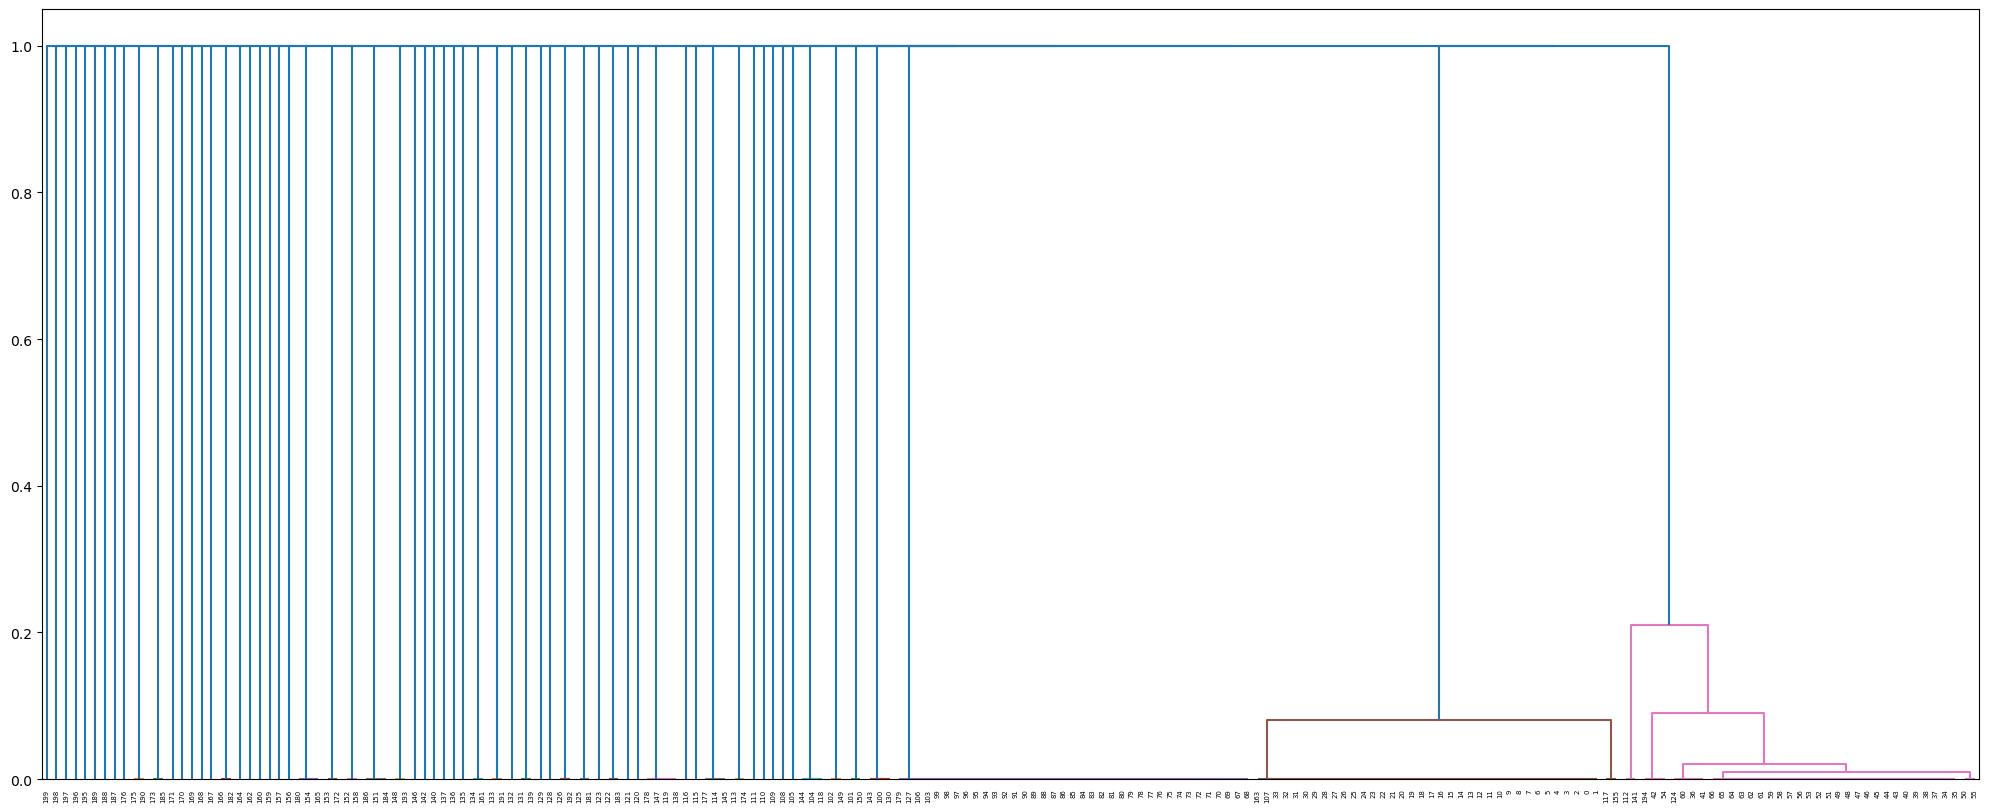

In [11]:
## single linkage clustering
Z = linkage(distance_condensed, 'single')

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()


In [12]:
## let's cut the trees at height 0.4 to get the clusters

clusters_id = fcluster(Z, t=0.4, criterion='distance')
clusters_id

array([23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 20,
       19, 22, 18, 25, 22, 23, 26, 27, 28, 29, 24, 17, 16, 30, 31, 23, 18,
       15, 32, 33, 14, 34, 24, 13, 12, 22, 35, 36, 21, 11, 37, 10,  9, 38,
       39, 40, 15, 11, 41, 24, 42, 21, 18, 16, 43, 15,  8, 19, 20,  7,  6,
        5,  4, 23, 44, 45,  6, 46, 47,  9, 48, 23, 49,  4,  3, 50, 51, 52,
       53, 54,  5,  2, 17,  1, 55, 16, 15, 22,  4, 13,  3, 14,  7,  2,  7,
       56, 57, 58,  1, 10, 12,  8, 24, 59, 60, 61, 62, 63], dtype=int32)

In [13]:
## now let's group points in the same cluster into a dict

ensemble_cc = {}

for i, k in enumerate(clusters_id):
    ensemble_cc.setdefault(k, set()).add(i)

ensemble_cc

{23: {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  107,
  117,
  155,
  163},
 24: {34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  112,
  124,
  141,
  194},
 22: {67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  103,
  106,
  127,
  179},
 21: {100, 130, 143},
 20: {101, 150},
 19: {102, 149},
 18: {104, 118, 144},
 25: {105},
 26: {108},
 27: {109},
 28: {110},
 29: {111},
 17: {113, 174},
 16: {114, 145, 177},
 30: {115},
 31: {116},
 15: {119, 138, 147, 178},
 32: {120},
 33: {121},
 14: {122, 183},
 34: {123},
 13: {125, 181},
 12: {126, 19

Text(0, 0.5, 'size')

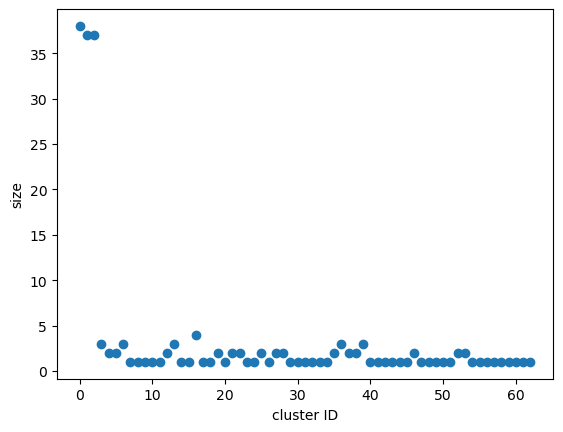

In [14]:
## there are 3 large connected components

plt.plot([len(ensemble_cc[k]) for k in ensemble_cc], 'o')
plt.xlabel('cluster ID')
plt.ylabel('size')

In [15]:
## lets 

N = 3

largest_cc = dict()

for i, k in enumerate(sorted(ensemble_cc, key= lambda key: len(ensemble_cc[key]), reverse=True)[:N]):
    largest_cc[i] = ensemble_cc[k].copy()

largest_cc.keys()

dict_keys([0, 1, 2])

Now that we have selected the 3 largest connected components from the ensamble BM, we run BM again multiple times. For each iteration we match the connected components to the 3 reference one and store them. This way we can get a measure of the variability of such connected components.

In [16]:
ensemble = ens.ensemble_BM_cc(X=X, eps=0.2, default_cc=largest_cc, num_it=100)

In [17]:
ens_lenghts = {k:[len(x) for x in ensemble[k]] for k in ensemble}
ens_lenghts.keys()

dict_keys([0, 1, 2])

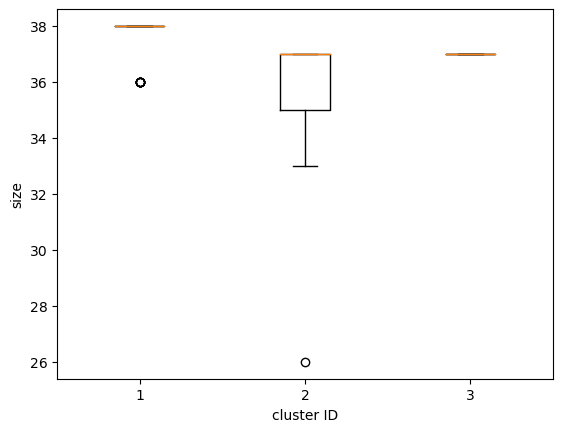

In [18]:
data = [ens_lenghts[k] for k in ens_lenghts]

# Multiple box plots in one plot
plt.boxplot(data)

plt.xlabel('cluster ID')
plt.ylabel('size')

plt.show()